#Method 1: Vader_lexicon

In [ ]:
from __future__ import print_function

In [1]:
import numpy as np 
import pandas as pd 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
tweets=pd.read_csv("/content/Elon_musk.csv",encoding = "ISO-8859-1", index_col=[0])
tweets.shape
tweets.head()

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


####We will use:

BeautifulSoup to remove HTML

Then we will remove non-letters and will split the sentences into words

Removal of Stopwords 

In [3]:
def clean(x):
    #Remove Html  
    x=BeautifulSoup(x).get_text()
    
    #Remove Non-Letters
    x=re.sub('[^a-zA-Z]',' ',x)
    
    #Convert to lower_case and split
    x=x.lower().split()
    
    #Remove stopwords
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]
    
    #join the words back into one string
    return(' '.join(words))

tweets.Text=tweets.Text.apply(lambda x:clean(x))
tweets.head()

,Text
1,kunalb alien
2,id aa carmack ray tracing cyberpunk hdr next l...
3,joerogan spotify great interview
4,gtera doge underestimated
5,teslacn congratulations tesla china amazing ex...


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
from nltk import tokenize

In [7]:
sid = SentimentIntensityAnalyzer()

In [8]:
tweets['sentiment_compound_polarity']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_positive']=tweets.Text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.shape
tweets.head()

,Text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type
1,kunalb alien,0.0000,1.000,0.000,0.000,NEUTRAL
2,id aa carmack ray tracing cyberpunk hdr next l...,0.0000,1.000,0.000,0.000,NEUTRAL
3,joerogan spotify great interview,0.6249,0.423,0.000,0.577,POSITIVE
4,gtera doge underestimated,-0.2732,0.488,0.512,0.000,NEGATIVE
5,teslacn congratulations tesla china amazing ex...,0.8271,0.510,0.000,0.490,POSITIVE


 We can see the individual analysis of Elon Musks tweets.

We can further analyze the Polarity of his tweets to get a better picture.

Whether his tweets are Positive Negative of Neutral. 

#Method 2: Sentiment Analysis

In [10]:
!pip install wordcloud

In [12]:
!pip install tweepy

In [13]:
!pip install plotly

In [15]:
!pip install textblob

In [16]:
import os
import numpy as np
import keras
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import math
import nltk
import csv
import sklearn
import plotly.offline as py 
import plotly.graph_objs as go
import textblob



from math import sqrt
from matplotlib import pyplot
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics import mean_squared_error
from textblob import TextBlob
from nltk.corpus import stopwords

from pandas import DataFrame

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
#nltk.download('stopwords')


py.init_notebook_mode(connected = True)
%matplotlib inline
#os.getcwd()

In [17]:
tweets=pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
tweets.shape
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [18]:
tweets = tweets.drop(['Unnamed: 0'], axis =1)

tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [19]:
# Data Cleanse #
tweets['Text'] = tweets['Text'].str.replace(r'http\S+', " ", case=False) # Remove HTML
tweets['Text'] = tweets['Text'].str.replace('RT @[\w]*', " ", case=False) 
tweets['Text'] = tweets['Text'].str.replace('&gt', " ", case=False)
tweets['Text'] = tweets['Text'].str.replace("[^a-zA-Z#]", " ", case=False) #Non-letters
tweets['Text'] = tweets['Text'].str.replace("www", " ", case=False)

In [20]:
# Test - Remove words < 3 characters (to remove stop words)#
tweets2 = tweets.copy()
tweets2['CText'] = tweets2['Text'].apply(lambda x: ' '.join([w for w in x.split() if
                                                           len(w)>3]))

In [21]:
#Tokenizer#
tokens = tweets2['CText'].apply(lambda x: x.split())
tokens.head()

0                                      [kunalb, alien]
1    [Carmack, tracing, Cyberpunk, with, next, leve...
2                [joerogan, Spotify, Great, interview]
3                        [gtera, Doge, underestimated]
4    [teslacn, Congratulations, Tesla, China, amazi...
Name: CText, dtype: object

In [22]:
tweets2.tail()

,Text,CText
1994,flcnhvy True it sounds so surreal but the n...,flcnhvy True sounds surreal negative propagand...
1995,PPathole Make sure to read ur terms amp con...,PPathole Make sure read terms conditions befor...
1996,TeslaGong PPathole Samwise Gamgee,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is U F ...,PPathole Altho Dumb Dumber
1998,Progress update August,Progress update August


In [23]:
#Remove common words + stop words - NLTK #
# play, player, played, plays --> play #

stop_words = set(stopwords.words('english'))
from nltk.stem.porter import *
stemmer = PorterStemmer() #stemming
tokens = tokens.apply(lambda x: [stemmer.stem(i)
                                         for i in x])

for i in range(len(tokens)):
    tokens[i] = ' '.join(tokens[i])

tokens2 = []
for w in tokens:
    if w not in stop_words:
        tokens2.append(w)
        
tweets2['Tokens'] = tokens
tweets2['Text'].replace('', np.nan, inplace=True)
tweets2.dropna(subset=['Text'], inplace=True)
tweets2.head()

,Text,CText,Tokens
0,kunalb I m an alien,kunalb alien,kunalb alien
1,ID AA Carmack Ray tracing on Cyberpunk with H...,Carmack tracing Cyberpunk with next level Have...,carmack trace cyberpunk with next level have tri
2,joerogan Spotify Great interview,joerogan Spotify Great interview,joerogan spotifi great interview
3,gtera Doge is underestimated,gtera Doge underestimated,gtera doge underestim
4,teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China amazing ex...,teslacn congratul tesla china amaz execut last...


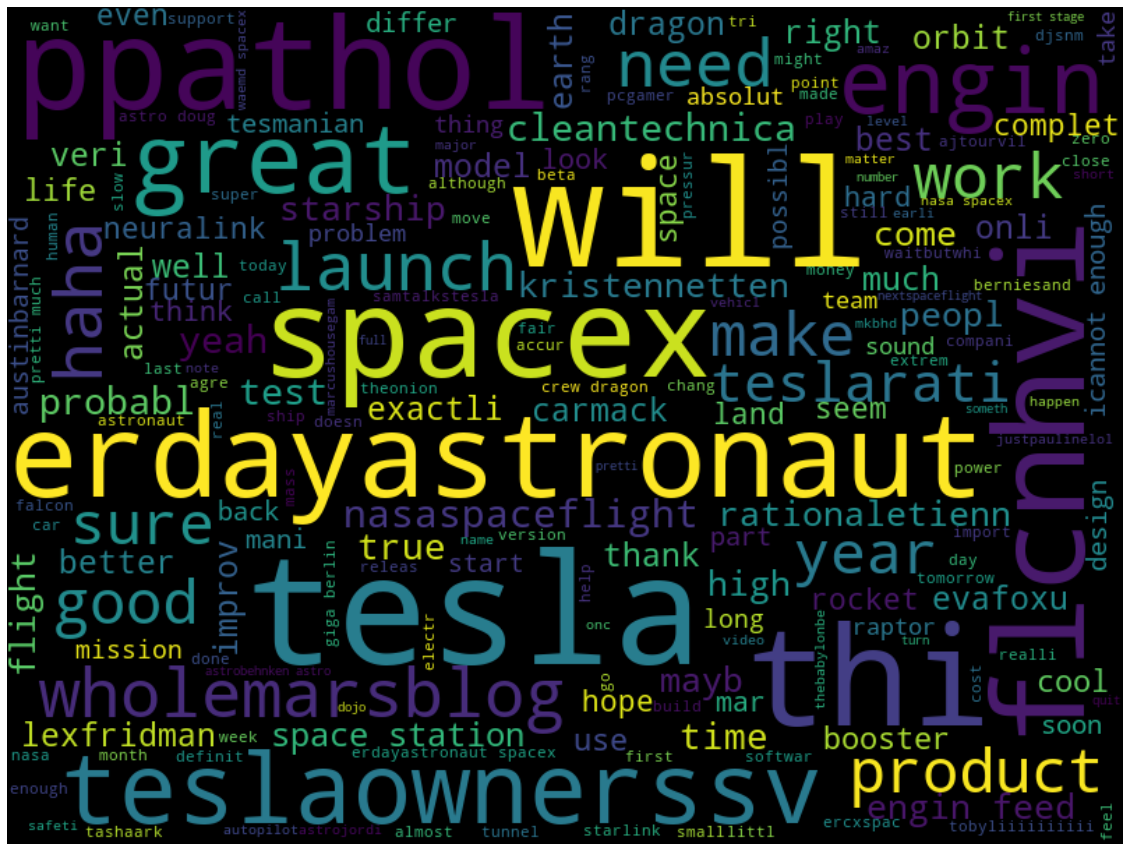

In [24]:
all_words = ' '.join([text for text in tweets2['Tokens']])
wordcloud = WordCloud(width=800, 
                      height=600, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


We can observe that most of his tweets are about:

SpaceX mission launches.

Tesla Models (Electric vehicels)

Future projects

Astronauts

Launches

Products 

#Text Blob - Sentiment Analysis (polarity)

In [25]:
def sentiment(x):
    sentValue = TextBlob(x)
    return sentValue.sentiment.polarity

tweets2['sentiment'] = tweets2['Text'].apply(sentiment)

conditions = [
    (tweets2['sentiment'] > 0 ), #Positive
    (tweets2['sentiment'] < 0),  #Negative
    (tweets2['sentiment'] == 0)]  #Neutral

choices = ['positive', 'negative', 'neutral']
tweets2['Pol_Name'] = np.select(conditions, choices, default=' ')
#tweets2

In [26]:
#Total Stats#
print('total tweets', len(tweets2))
print('positive tweets', sum(tweets2['Pol_Name'] == 'positive')/len(tweets2)*100, '%')
print('negative tweets', sum(tweets2['Pol_Name'] == 'negative')/len(tweets2)*100, '%')
print('neutral tweets',sum(tweets2['Pol_Name'] == 'neutral')/len(tweets2)*100, '%')

total tweets 1999
positive tweets 44.772386193096544 %
negative tweets 11.605802901450724 %
neutral tweets 43.621810905452726 %


#Insights:
 We can see that most of Elon Musks tweets are Positive (44%).

We can also observe most of his tweets are Neutral (43%).

Almost 11% of his tweets are Negative. 